In [2]:
library(forecast)
library(fpp2)

#-과제 목적 : ets모델에서 트렌드, 계절은 N이고 error가 가법,승법에 따라 어떻게 달라지는지 파악하기 위함이였음.

Loading required package: ggplot2

Loading required package: fma

Loading required package: expsmooth



# D.I.Y 1

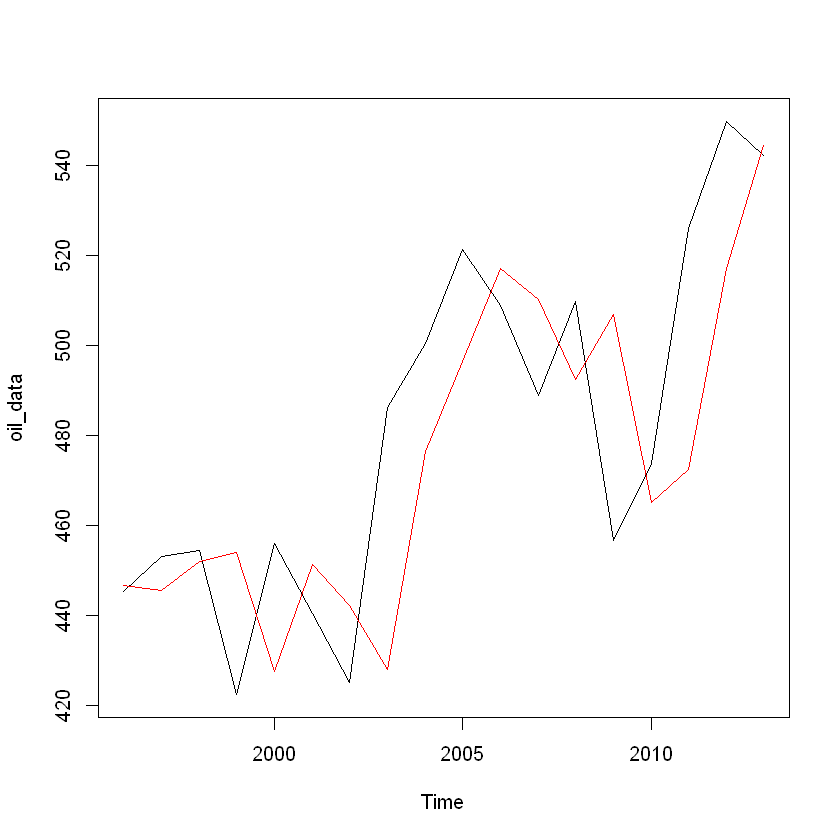

In [7]:
# oil 데이터 <- 단순지수평활법 적용
# 단순지수평활법은 예측값 보여줄 필요 X 왜? 주어진데이터의 실제값이 없기때문
oil_data<-window(oil, start=1996)
oil_ses<-ses(oil_data, initial='optimal')
plot(oil_data)
lines(oil_ses$fitted, col='red')


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = aus_data, h = 5) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

Error measures:
                      ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.008359331 2.182343 1.52892 -0.3244107 3.820787 0.6654839
                    ACF1
Training set -0.01335362

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017       74.60130 71.57106 77.63154 69.96695 79.23566
2018       76.70304 72.76440 80.64169 70.67941 82.72668
2019       78.80478 74.13092 83.47864 71.65673 85.95284
2020       80.90652 75.59817 86.21487 72.78810 89.02494
2021       83.00826 77.13343 88.88310 74.02348 91.99305


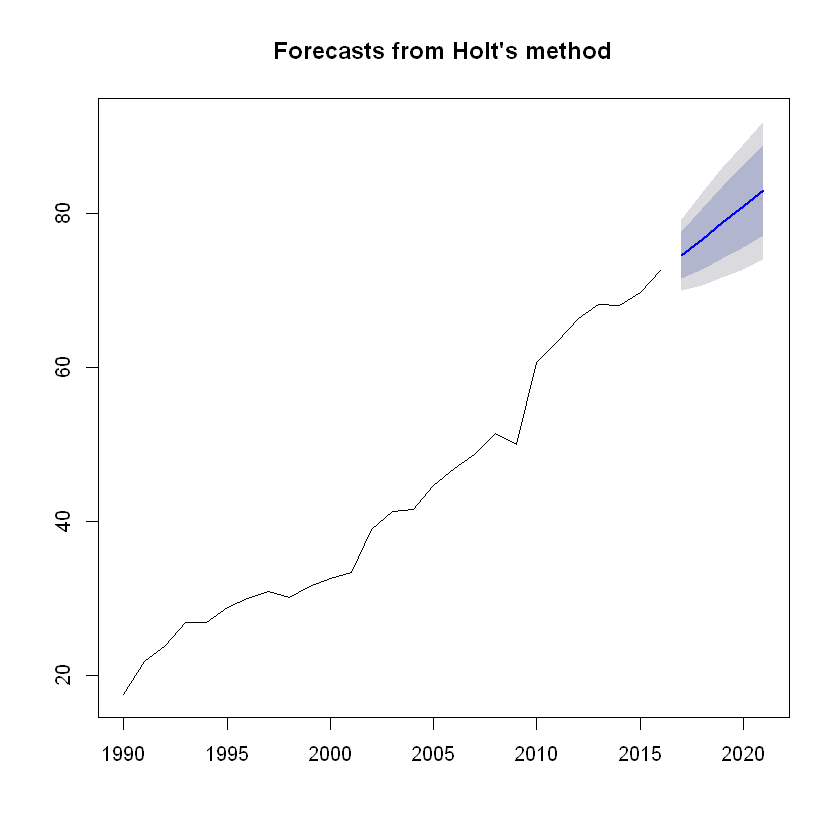


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = aus_data, h = 5, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.8691 
    beta  = 0.0409 
    phi   = 0.98 

  Initial states:
    l = 15.373 
    b = 2.2224 

  sigma:  2.532

     AIC     AICc      BIC 
145.6239 149.8239 153.3989 

Error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.3991511 2.285529 1.529037 0.560457 3.672339 0.6655348
                    ACF1
Training set -0.03143013

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017       74.10429 70.85945 77.34913 69.14174 79.06685
2018       75.72699 71.34160 80.11238 69.02012 82.43386
2019       77.31724 71.95975 82.67472 69.12367 85.51081
2020       78.87568 72.63402 85.11733 69.32989 88.42147
2021       80.40295 73.33096 87.47494 69.58727 91.21862


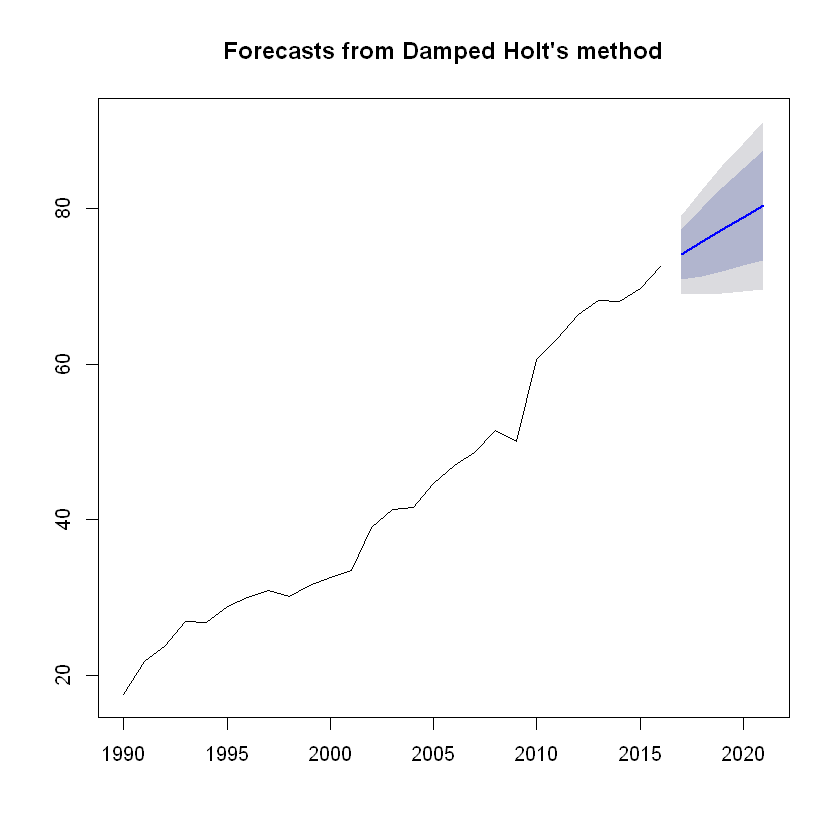

In [34]:
# ausair데이터 <- holt선형지수평활법 적용
aus_data<-window(ausair, start=1990)
aus_holt<-holt(aus_data, h=5)
plot(aus_holt)
summary(aus_holt)

# ausair데이터 <- 감쇠추세의 holt선형지수평활법 적용
aus_holt_d<-holt(aus_data, h=5, damped = TRUE)
plot(aus_holt_d)
summary(aus_holt_d)

## 감쇠추세가 아닌 holt선형지수평활법이 더 RMSE값이 낮음!

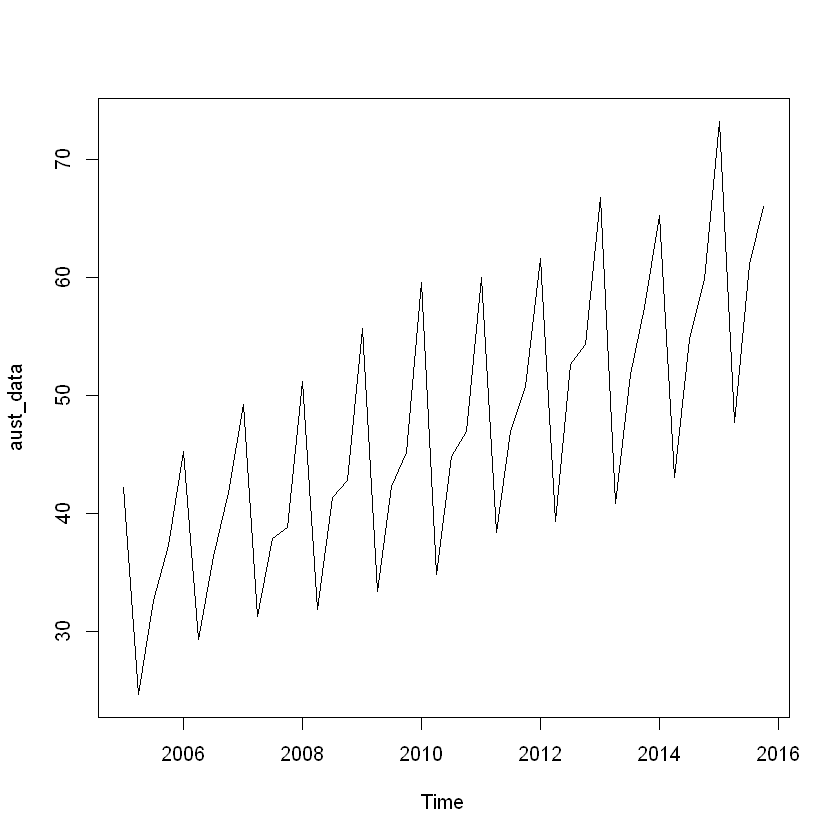


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = aust_data, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4406 
    beta  = 0.0134 
    gamma = 0.0023 

  Initial states:
    l = 32.4875 
    b = 0.6974 
    s = 1.0237 0.9618 0.7704 1.2442

  sigma:  0.0367

     AIC     AICc      BIC 
221.1313 226.4254 237.1890 

Error measures:
                     ME     RMSE     MAE           MPE    MAPE      MASE
Training set 0.09206228 1.575631 1.25496 -0.0006505533 2.70539 0.4112302
                    ACF1
Training set -0.07955726

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       80.08894 76.31865 83.85922 74.32278 85.85509
2016 Q2       50.15482 47.56655 52.74309 46.19640 54.11324
2016 Q3       63.34322 59.80143 66.88502 57.92652 68.75993
2016 Q4       68.17810 64.08399 72.27221 61.91670 74.43950
2017 Q1       83.80112 78.43079 89.17146 75.58790 92.01434
2017 Q

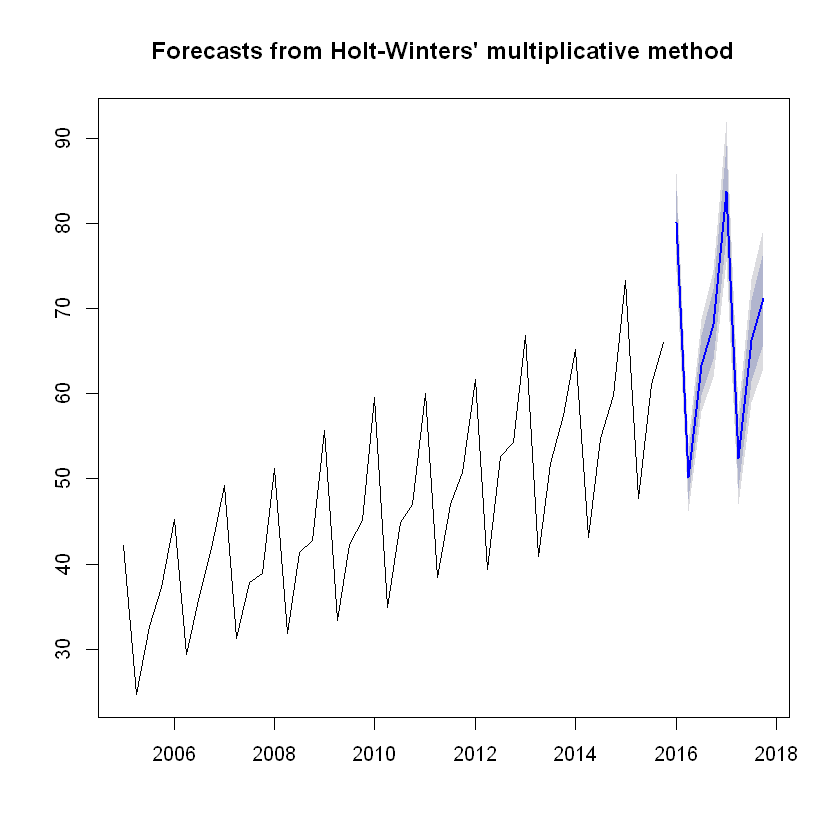

In [40]:
# austourists 데이터 <- 홀트-윈터스모형 적용
aust_data<-window(austourists, start=2005)
plot(aust_data)
# 원본 데이터의 추세가 증가하므로 '승법'모형 적용해보기!

aust_hw<-hw(aust_data, seasonal='multiplicative')
plot(aust_hw)
summary(aust_hw)

# 홀트윈터스(승법)모형이 홀트선형치수보다 RMSE값이 더 낮음! 
# 홀트윈터스(승법)모형이 지금까진 가장 최적 모형!

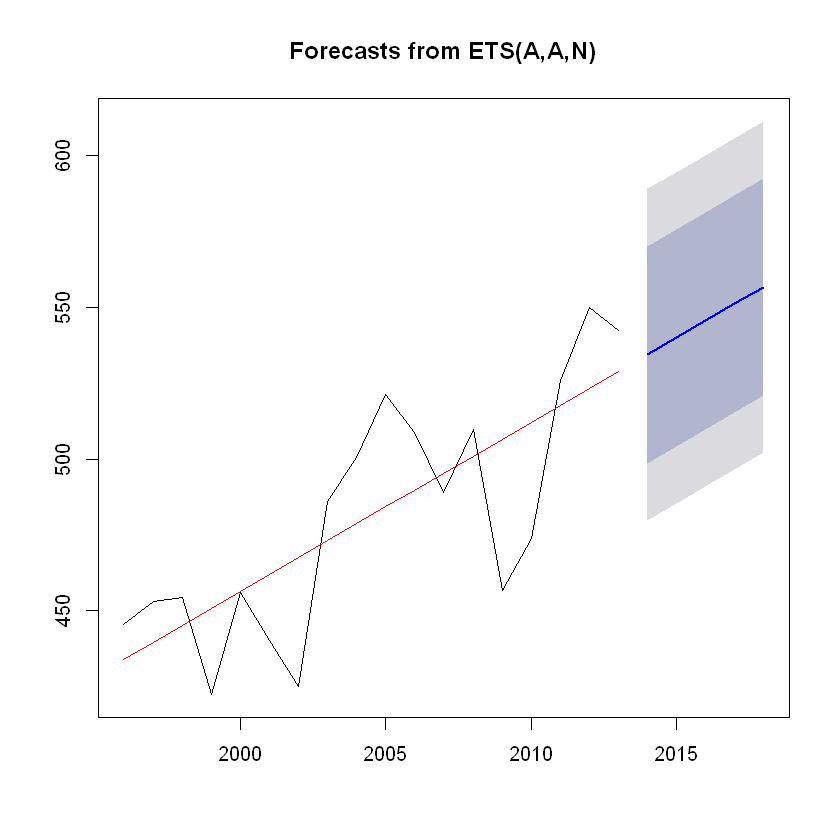

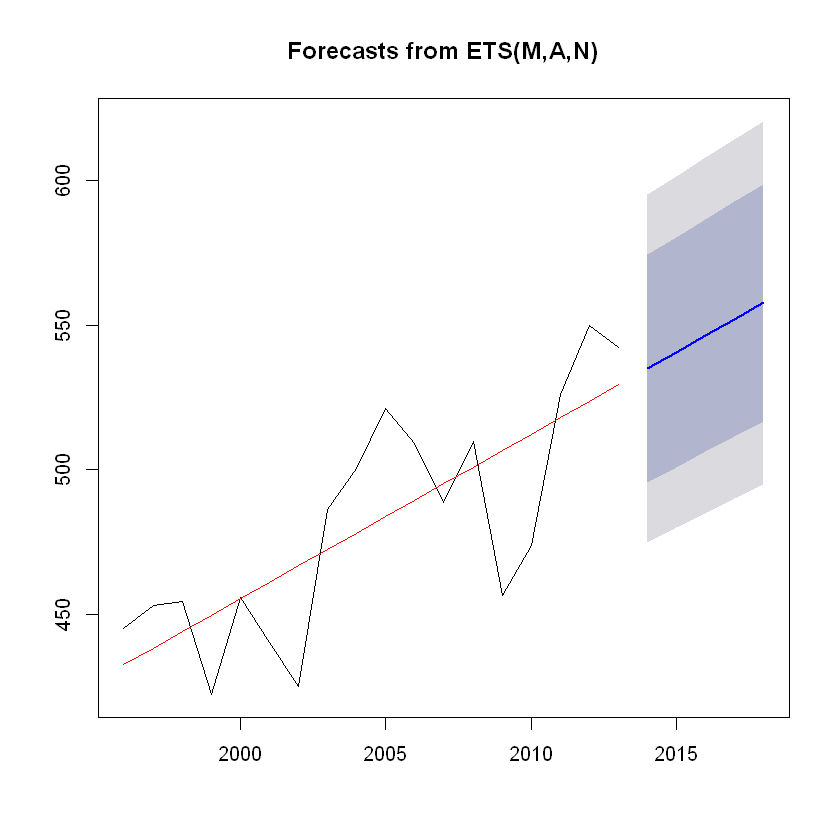

In [47]:
# ETS모형비교 
# 계절성분이 없음을 전제하고 가법 error와 승법 error일 때 비교해보기

#oil data
# 1.가법 error + 추세성분 더함 + 계절성분 없음
oil_ets_AAN = ets(oil_data, model='AAN')
# 2.승법 error + 추세성분 더함 + 계절성분 없음
oil_ets_MAN = ets(oil_data, model='MAN')

for_AAN<-forecast(oil_ets_AAN, h=5)
for_MAN<-forecast(oil_ets_MAN, h=5)
plot(for_AAN)
lines(for_AAN$fitted, col='red')

plot(for_MAN)
lines(for_MAN$fitted, col='red')

# 가법 error와 승법 error의 차이가 뭔지는 여기서 모르겠음;;
# oil data 미래값 예측하기에는 ETS모형보다는 홀트윈터스(승법)이 좋음!

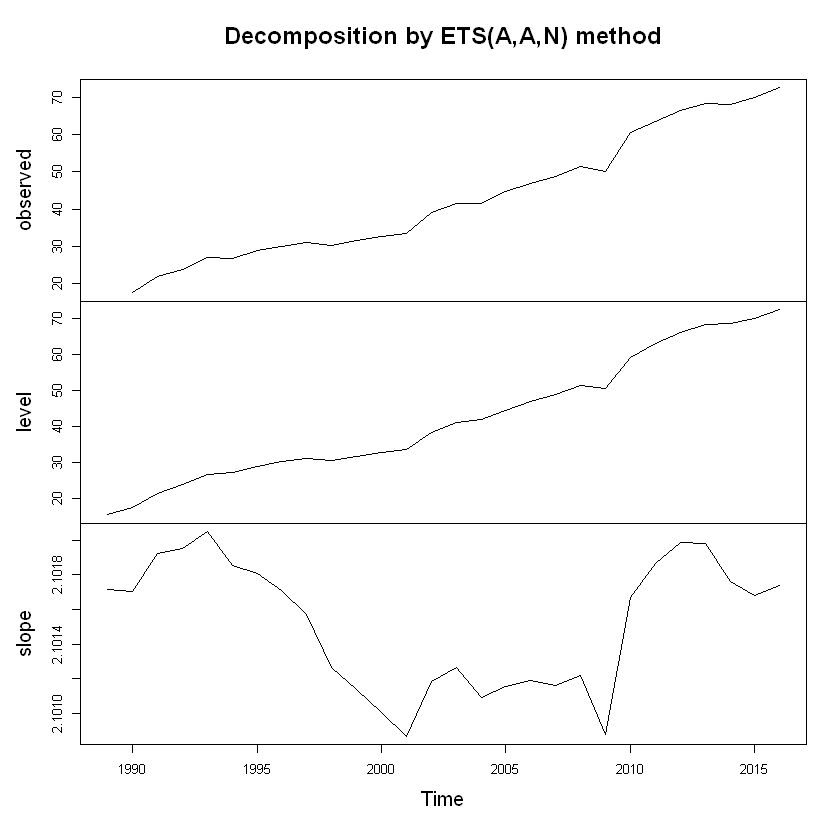

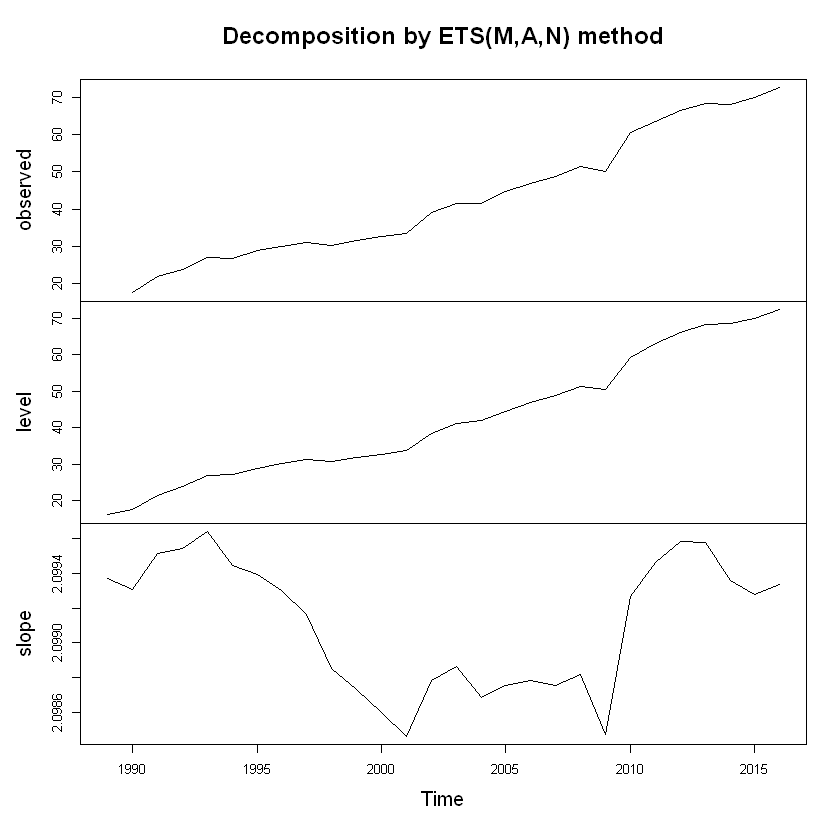

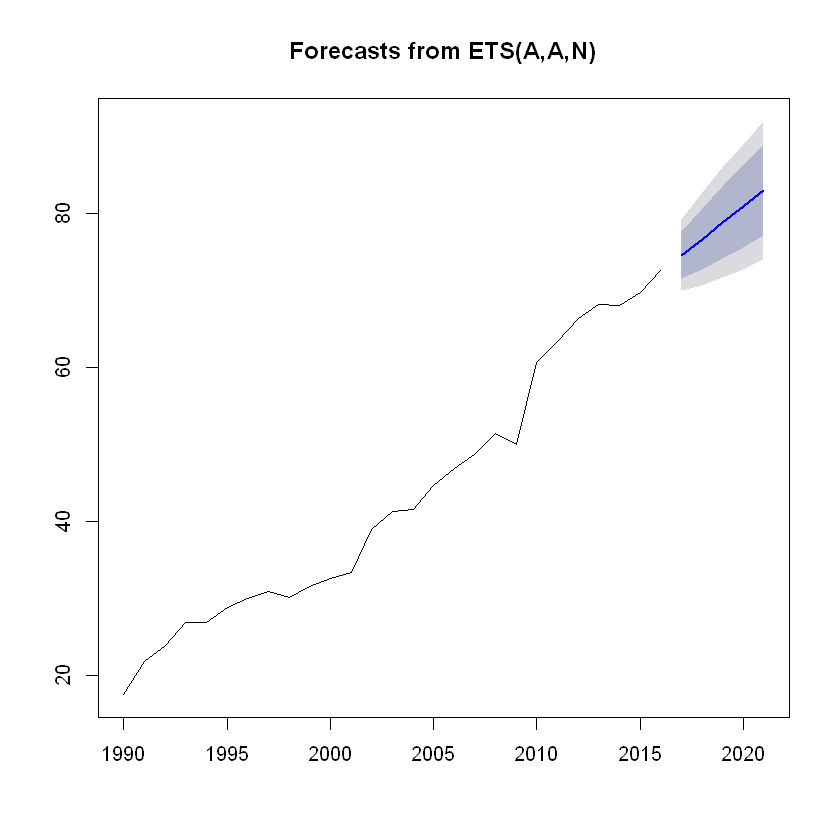

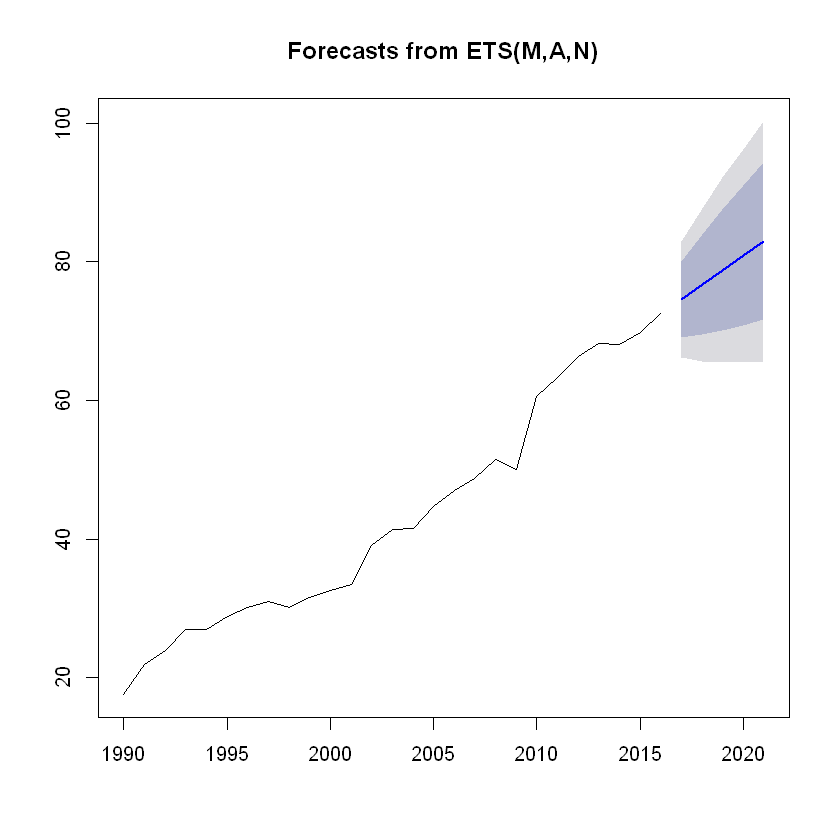

In [79]:
# ETS모형비교 
# 계절성분이 없음을 전제하고 가법 error와 승법 error일 때 비교해보기

#ausair data
# 1.가법 error + 추세성분 더함 + 계절성분 없음
aus_ets_AAN = ets(aus_data, model='AAN')
# 2.승법 error + 추세성분 더함 + 계절성분 없음
aus_ets_MAN = ets(aus_data, model='MAN')

for_AAN<-forecast(aus_ets_AAN, h=5)
for_MAN<-forecast(aus_ets_MAN, h=5)
plot(aus_ets_AAN)
plot(aus_ets_MAN)
# 예측값 시각화
plot(for_AAN)
plot(for_MAN)

# 통계값 요약
#summary(aus_ets_AAN)
#summary(aus_ets_MAN)

## 가법 ERROR 승법 ERRO 대체 차이가뭔가...?

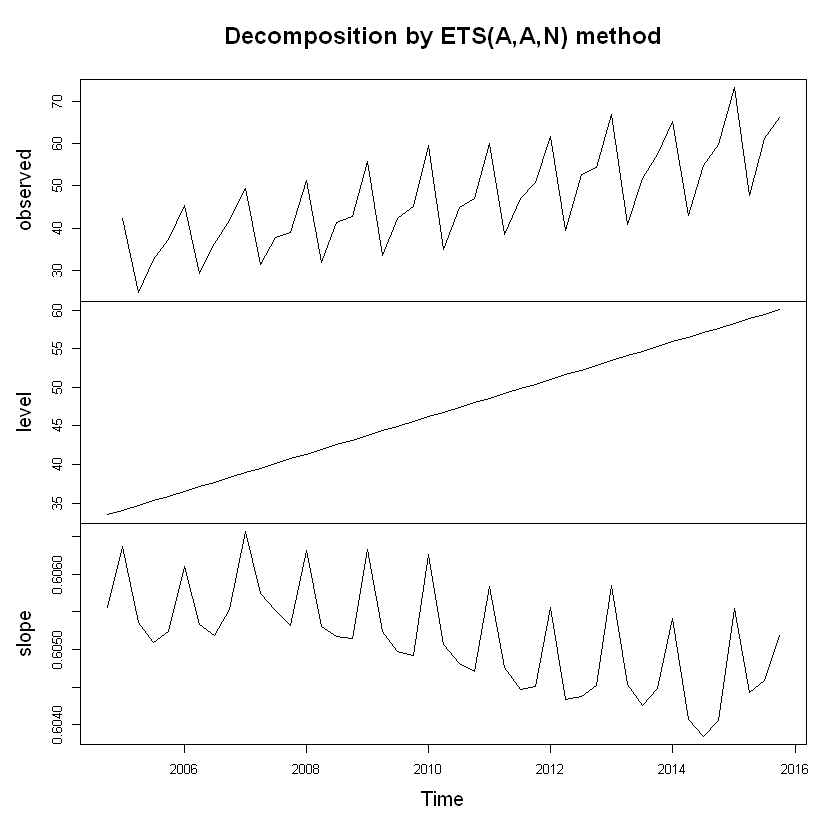

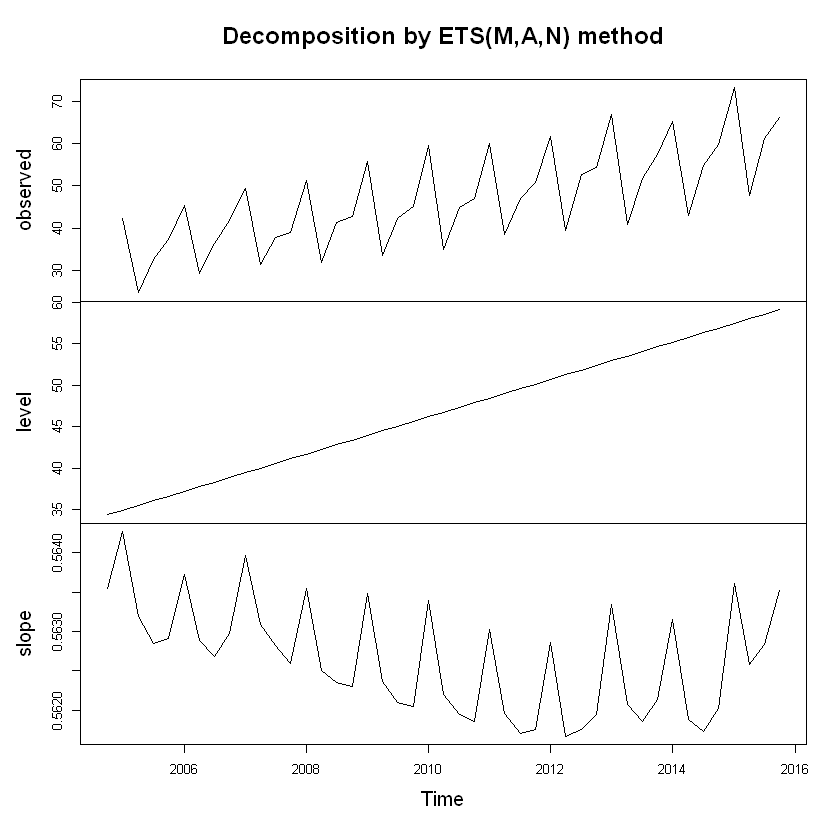

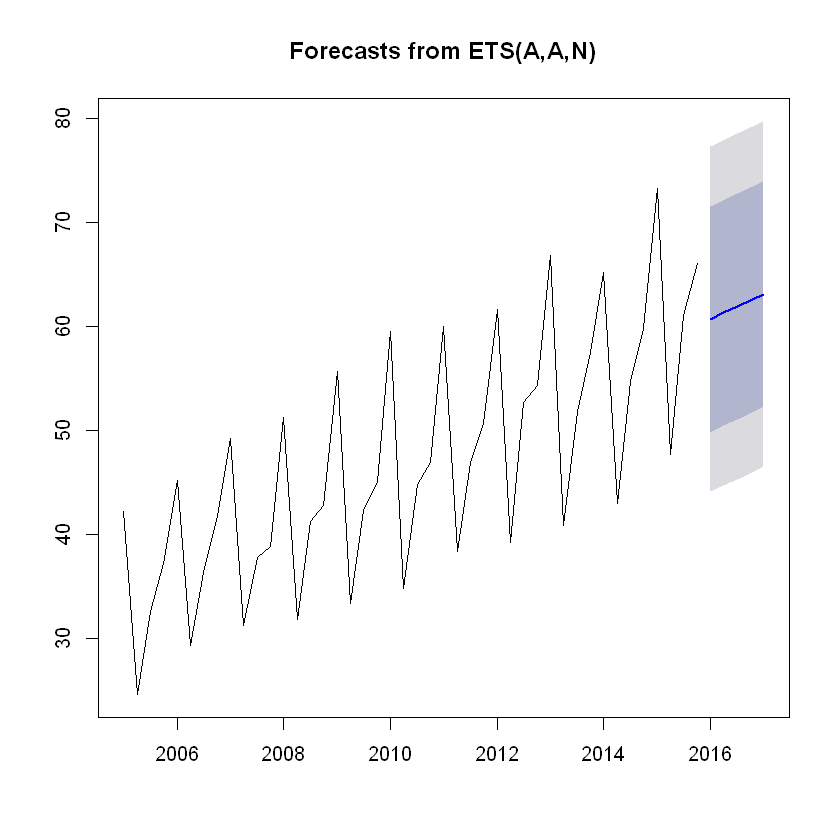

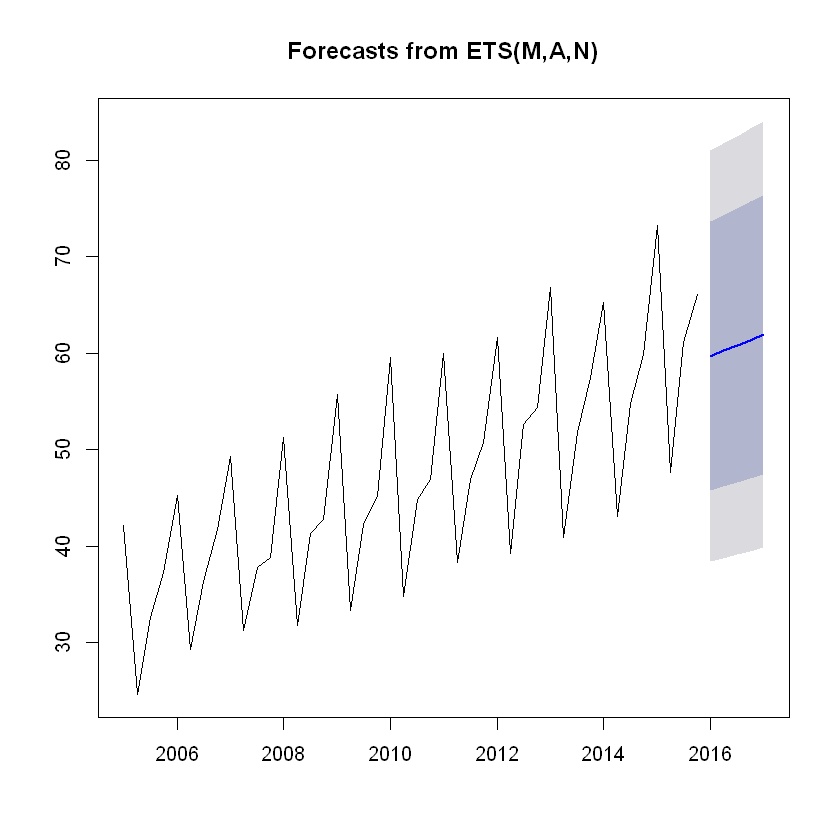

In [80]:
# ETS모형비교 
# 계절성분이 없음을 전제하고 가법 error와 승법 error일 때 비교해보기

#austourists data
# 1.가법 error + 추세성분 더함 + 계절성분 없음
aust_ets_AAN = ets(aust_data, model='AAN')
# 2.승법 error + 추세성분 더함 + 계절성분 없음
aust_ets_MAN = ets(aust_data, model='MAN')

for_AAN<-forecast(aust_ets_AAN, h=5)
for_MAN<-forecast(aust_ets_MAN, h=5)
plot(aust_ets_AAN)
plot(aust_ets_MAN)
# 예측값 시각화
plot(for_AAN)
plot(for_MAN)

# 통계값 요약
#summary(aust_ets_AAN)
#summary(aust_ets_MAN)

## 가법 ERROR 승법 ERRO 대체 차이가뭔가...?
## 차이라고하면 RMSE값의 미세한 차이밖에 없다...

# D.I.Y 2

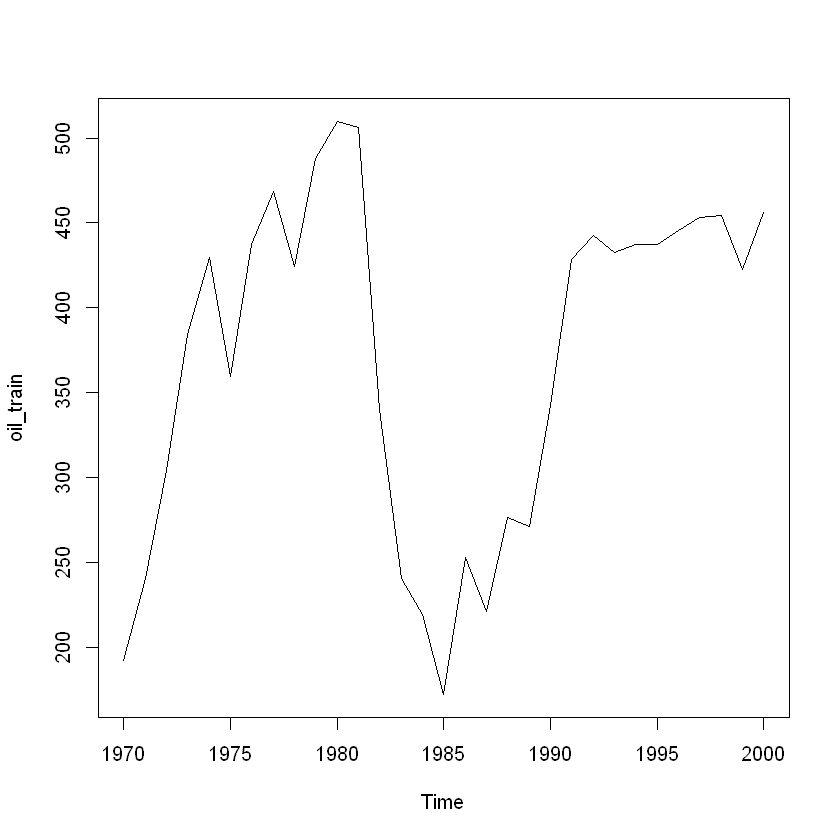

In [49]:
plot(oil_train)

In [55]:
# oil data
oil_train<-window(oil, start=1970, end=2000)
oil_test<-window(oil, start=2001, end=2013)

oil_train_ses<-ses(oil_train, initial='optimal')
# ets모형
# 추세성분 없음 => N
# error => 가법/승법 다해보기
# 계절성분 없음 => N
oil_train_ets1<-ets(oil_train, model='ANN')
oil_train_ets2<-ets(oil_train, model='MNN')
summary(oil_train_ets1)
summary(oil_train_ets2)

ETS(A,N,N) 

Call:
 ets(y = oil_train, model = "ANN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 192.1187 

  sigma:  58.4811

     AIC     AICc      BIC 
362.6458 363.5347 366.9478 

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE     MASE      ACF1
Training set 8.514241 56.56321 42.74899 1.237683 13.11478 0.967799 0.1889093
ETS(M,N,N) 

Call:
 ets(y = oil_train, model = "MNN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 186.1941 

  sigma:  0.1876

     AIC     AICc      BIC 
368.8802 369.7691 373.1822 

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE      ACF1
Training set 8.705387 56.57341 42.94014 1.337146 13.21424 0.9721264 0.1915265


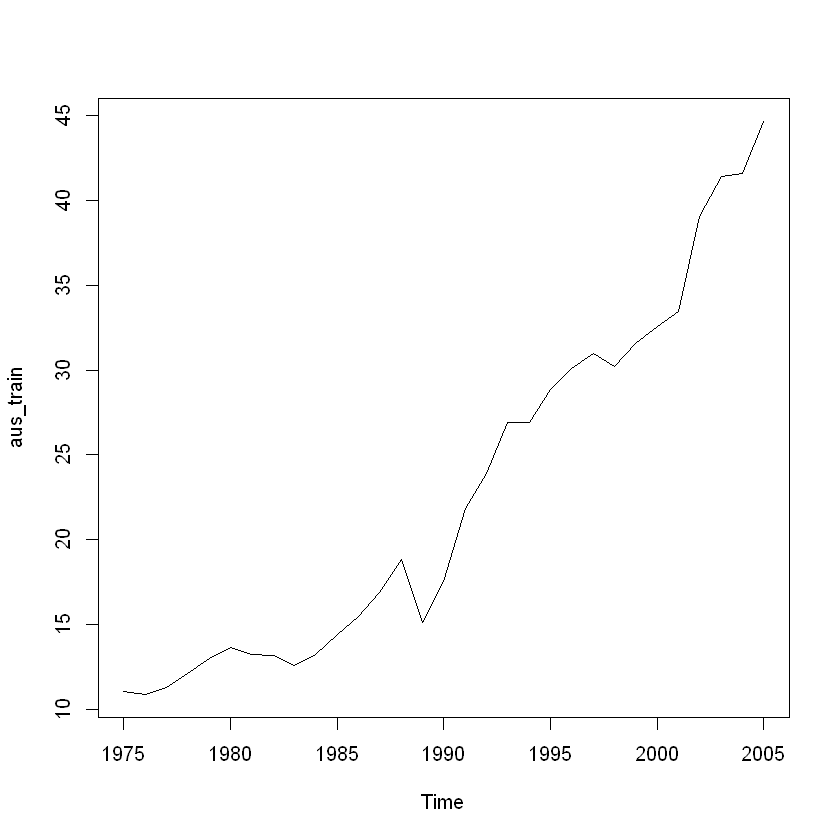

In [57]:
plot(aus_train)

ETS(A,A,N) 

Call:
 ets(y = aus_train, model = "AAN") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 9.9867 
    b = 1.1251 

  sigma:  1.736

     AIC     AICc      BIC 
146.3696 148.7696 153.5396 

Training set error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.006195664 1.620146 1.118594 -1.591612 5.584888 0.7440821
                  ACF1
Training set 0.0473453
ETS(M,A,N) 

Call:
 ets(y = aus_train, model = "MAN") 

  Smoothing parameters:
    alpha = 0.9433 
    beta  = 1e-04 

  Initial states:
    l = 10.097 
    b = 0.7781 

  sigma:  0.0812

     AIC     AICc      BIC 
143.5966 145.9966 150.7666 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3526798 1.664772 1.147784 0.2435318 5.407749 0.7634988
                   ACF1
Training set 0.09926494


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.006195664,1.620146,1.118594,-1.591612,5.584888,0.7440821,0.0473453,NA
Test set,7.248754159,9.151641,7.248754,11.597071,11.597071,4.8218279,0.6064756,1.821945


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.006195664,1.620146,1.118594,-1.591612,5.584888,0.7440821,0.0473453,NA
Test set,7.248754159,9.151641,7.248754,11.597071,11.597071,4.8218279,0.6064756,1.821945


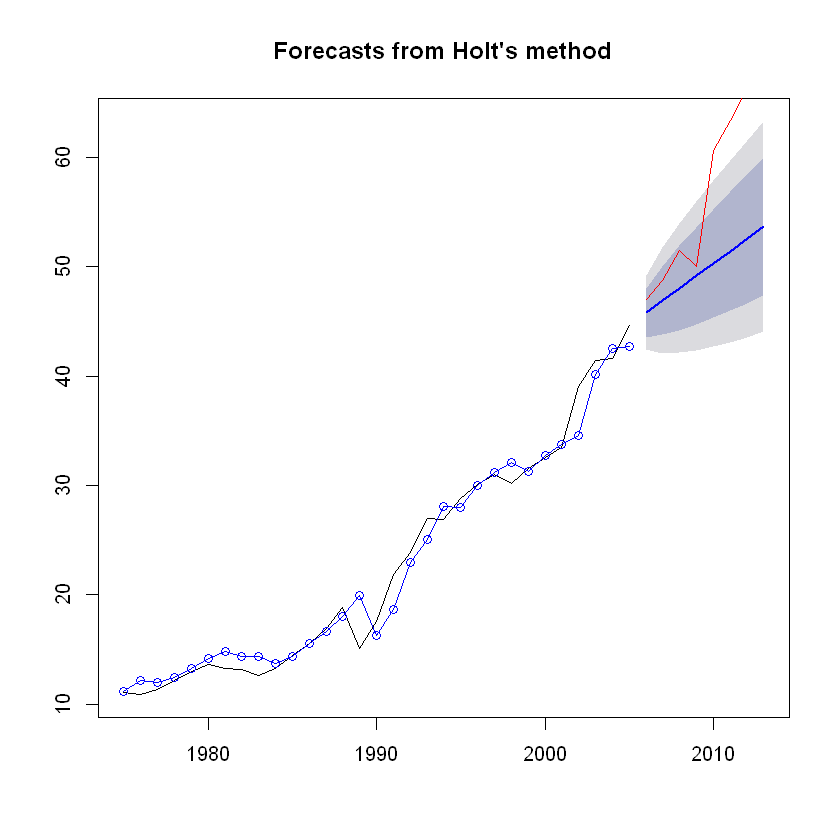

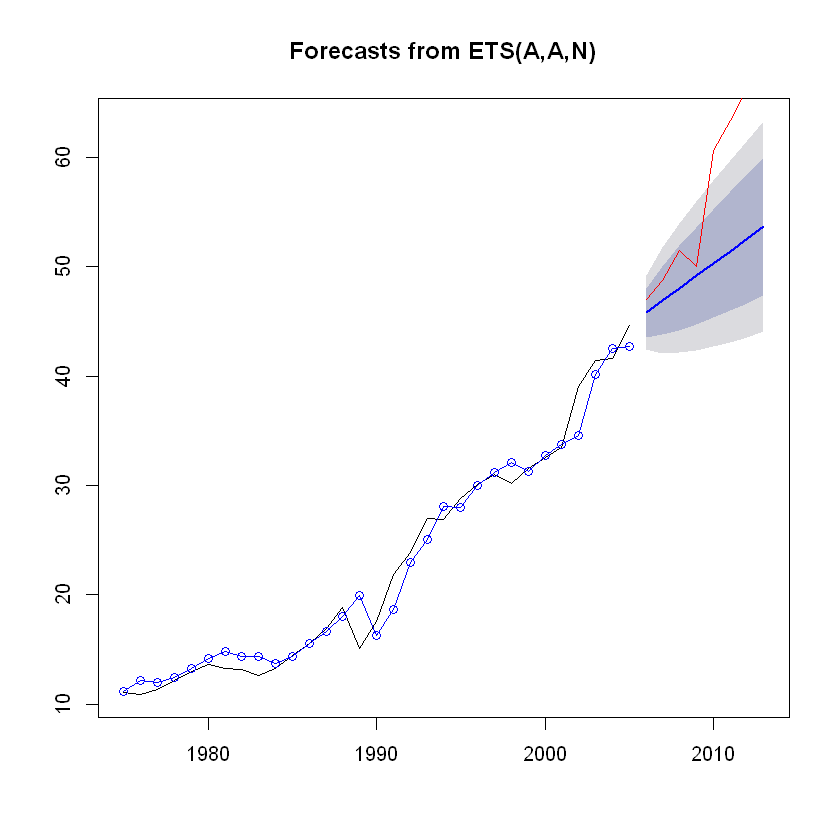

In [68]:
# ausair data
aus_train<-window(ausair, start=1975, end=2005)
aus_test<-window(ausair, start=2006, end=2016)
# 감쇠추세법보다는 just holt선형이 더 RMSE값이 낮았었음!
aus_train_holt<-holt(aus_train, h=8)

#ets모형
# 추세 있음 => A
# 계절 성분 없음 => N
# 가법 ERROR/ 승법 ERROR 모두 써보자

aus_train_ets1<-ets(aus_train, model='AAN')
aus_train_ets2<-ets(aus_train, model='MAN')
summary(aus_train_ets1) #RMSE값이 미세하게 더 낮음!
summary(aus_train_ets2)

# 홀트선형 VS ETS(AAN) 모형 예측값 정확도 비교
for_holt<-forecast(aus_train_holt, h=8)
for_ets<-forecast(aus_train_ets1, h=8)

accuracy(for_holt, aus_test)
accuracy(for_ets, aus_test)

# 홀트선형 예측값 vs 실제 예측값
plot(for_holt)
lines(aus_test, col='red')
lines(for_holt$fitted, col='blue', type='o')

# ets모형 예측값 vs 실제 예측값
plot(for_ets)
lines(aus_test, col='red')
lines(for_ets$fitted, col='blue', type='o')

ETS(M,A,M) 

Call:
 ets(y = aust_train, model = "MAM") 

  Smoothing parameters:
    alpha = 0.395 
    beta  = 0.0028 
    gamma = 1e-04 

  Initial states:
    l = 28.938 
    b = 0.4689 
    s = 1.038 0.9578 0.7703 1.2339

  sigma:  0.0629

     AIC     AICc      BIC 
340.6482 344.4780 359.0357 

Training set error measures:
                       ME     RMSE     MAE        MPE     MAPE      MASE
Training set -0.006541242 2.112958 1.63211 -0.5071105 4.475832 0.6043028
                    ACF1
Training set -0.04491261
ETS(A,A,A) 

Call:
 ets(y = aust_train, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.1991 
    beta  = 1e-04 
    gamma = 0.4455 

  Initial states:
    l = 27.9596 
    b = 0.4702 
    s = 2.4801 -0.9955 -6.4086 4.9241

  sigma:  2.42

     AIC     AICc      BIC 
340.5818 344.4116 358.9693 

Training set error measures:
                       ME    RMSE      MAE        MPE     MAPE     MASE
Training set -0.001829733 2.24373 1.700587 -0.7958349 4.785456 0.6296

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.06423506,2.181797,1.607172,-0.8168361,4.488267,0.5950692,0.1017023,NA
Test set,4.86514515,5.022317,4.865145,7.9780558,7.978056,1.8013618,0.2959114,0.3665437


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.006541242,2.112958,1.632110,-0.5071105,4.475832,0.6043028,-0.04491261,NA
Test set,5.085516691,5.218722,5.085517,8.3325580,8.332558,1.8829563,0.25372019,0.3853695


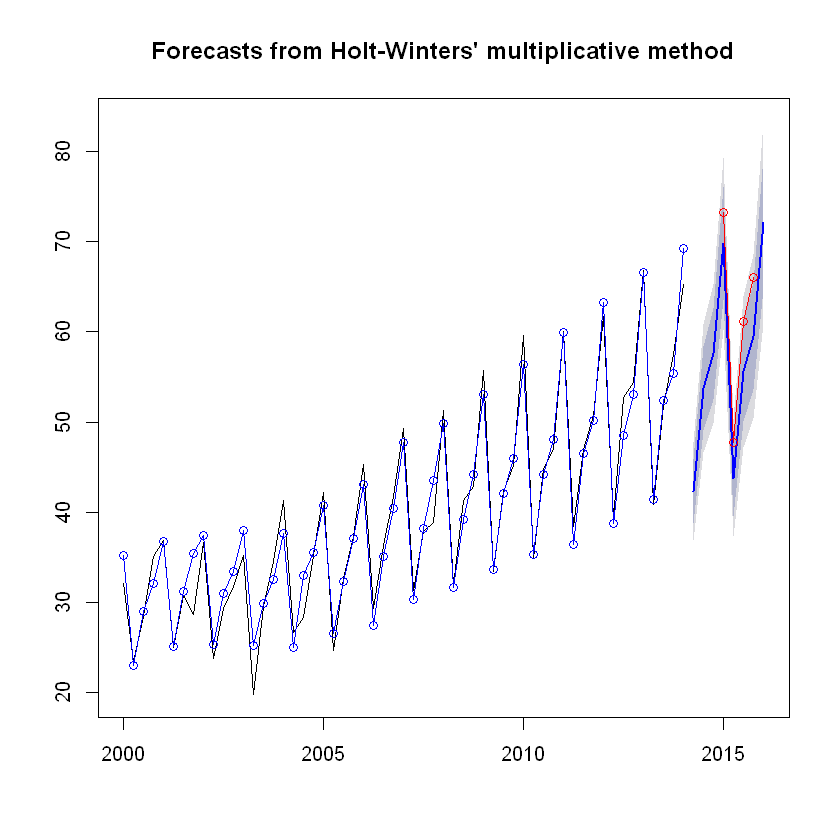

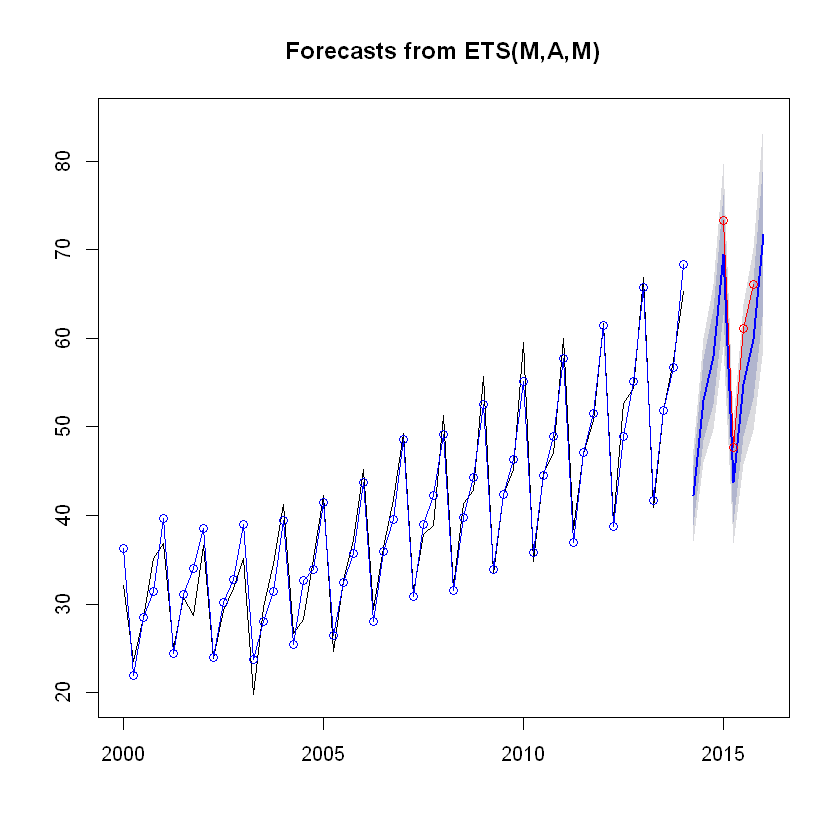

In [78]:
# austourists data
aust_train<-window(austourists, start=2000, end=2014)
aust_test<-window(austourists, start=2015)

# 홀트윈터스(승법)모형 적용
aust_train_hw<-hw(aust_train, seasonal='multiplicative')

# ets모형 적용
# Error => 계절성분이 승법이기 떄문에 '승법 ERROR' 적용
# 추세를더해줌 => 'A'
# 계절성분있으면서 증가 => 'M'(승법)

aust_train_ets1<-ets(aust_train, model='MAM') # RMSE값이 더 낮음!=>선정
aust_train_ets2<-ets(aust_train, model='ZZZ')

summary(aust_train_ets1)
summary(aust_train_ets2)

# 예측값 할당
for_hw<-forecast(aust_train_hw, h=8)
for_ets<-forecast(aust_train_ets1, h=8)

# 실제값과 비교해 정확도 측정
accuracy(for_hw, aust_test) 
# 홀트윈터스가 Train RMSE값은 조~금 높지만 TEST RMSE값이 더 낮음 
# Test RMSE - Train RMSE Gap이 홀트윈터스가 더 작음! => 홀트윈터스 선정
accuracy(for_ets, aust_test) 

# 그래프로 시각화
plot(for_hw)
lines(aust_test, col='red', type='o')
lines(for_hw$fitted, col='blue', type='o')

plot(for_ets)
lines(aust_test, col='red', type='o')
lines(for_ets$fitted, col='blue', type='o')